In [1]:
fjcmakedir="/Users/ploskon/devel/fjcmake/"

In [2]:
import sys

In [3]:
sys.path.append("{}/test/build/python/build/lib/CMakeSwig/fastjet".format(fjcmakedir))
sys.path.append("{}/test/build/python/build/lib/CMakeSwig/recursivetools".format(fjcmakedir))
sys.path.append("{}/test/pythia8235inst/lib".format(fjcmakedir))
sys.path.append("{}/test/build/python/build/lib/CMakeSwig/pythiafjtools".format(fjcmakedir))

In [4]:
import pyfastjet as fj
import pyrecursivetools as rectools
import pythia8
import pypythiafjtools as pyfj

In [5]:
def print_jets(jets):
    print("{0:>5s} {1:>10s} {2:>10s} {3:>10s} {4:>12s}".format(
        "jet #", "pt", "rap", "phi", "N particles"))

    for ijet in range(len(jets)):
        jet = jets[ijet]
        constituents = jet.constituents()
        print("{0:5d} {1:10.3f} {2:10.4f} {3:10.4f} {4:10.3f}".format(
            ijet, jet.pt(), jet.rap(), jet.phi(), len(constituents)))

In [6]:
pythia = pythia8.Pythia()
pythia.readString("Beams:eCM = 8000.")
pythia.readString("HardQCD:all = on")
pythia.readString("PhaseSpace:pTHatMin = 20.")
pythia.readString("Next:numberShowEvent = 0")
pythia.readString("Next:numberShowInfo = 0")
pythia.readString("Next:numberShowProcess = 0")
pythia.init()

True

In [23]:
# set up our jet definition and a jet selector
jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
selector = fj.SelectorPtMin(20.0) & fj.SelectorAbsRapMax(1)

In [24]:
all_jets = []

In [25]:
from tqdm import tnrange, tqdm_notebook

In [26]:
for iEvent in tqdm_notebook(range(10000), 'event'):
    # print ("iEvent: ", iEvent)
    if not pythia.next(): continue
    parts = pyfj.vectorize(pythia, True, -1, 1)
    # print(" - number of particles: ", len(parts))
    jets = selector(jet_def(parts))
    all_jets.extend(jets)
    # print_jets(jets)
pythia.stat();

In [27]:
etas = [j.eta() for j in all_jets]
pts = [j.pt() for j in all_jets]

In [37]:
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import pandas as pd

<IPython.core.display.Javascript object>


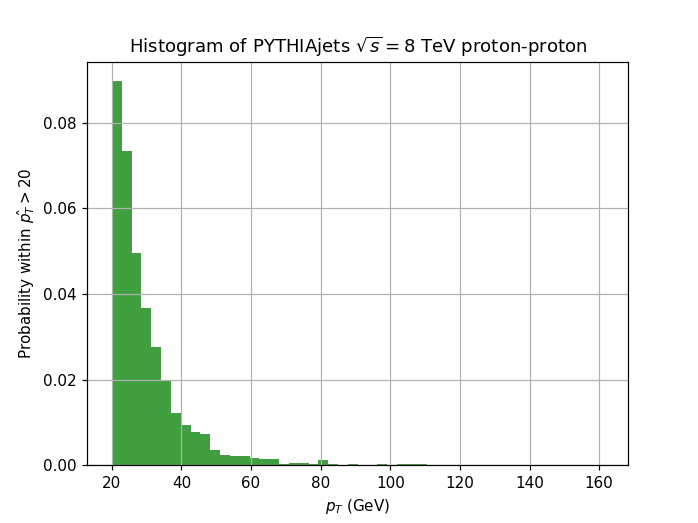

In [48]:
n, bins, patches = plt.hist(pts, 50, density=1, facecolor='green', alpha=0.75)
plt.xlabel(r'$p_{T}$ (GeV)')
plt.ylabel('Probability within $\hat{p_{T}} > 20$')
plt.title(r'$\mathrm{Histogram\ of\ PYTHIA jets}\ \sqrt{s}=8\ \mathrm{TeV}$ proton-proton')
plt.grid(True)